<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [12]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [13]:
df.shape

(17284, 5)

In [14]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [15]:
ny_df = df[df['state']=='New York']

In [16]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [17]:
ny_df.shape

(316, 5)

In [18]:
ny_df.tail()

,date,state,fips,cases,deaths
17042,2021-01-06,New York,36,1064554,38486
17097,2021-01-07,New York,36,1082142,38683
17152,2021-01-08,New York,36,1101702,38846
17207,2021-01-09,New York,36,1119541,39041
17262,2021-01-10,New York,36,1135849,39208


In [19]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [20]:
#total number of cases
ny_df['cases'].max()

1135849

In [21]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

136927749

Finding new covid 19 cases on daily basis (new cases added everyday)

In [22]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [23]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [36]:
ny_df.tail(10)

,date,state,fips,cases,deaths,new_cases
16767,2021-01-01,New York,36,996073,37733,17033
16822,2021-01-02,New York,36,1011922,37854,15849
16877,2021-01-03,New York,36,1024154,38001,12232
16932,2021-01-04,New York,36,1035396,38167,11242
16987,2021-01-05,New York,36,1048538,38315,13142
17042,2021-01-06,New York,36,1064554,38486,16016
17097,2021-01-07,New York,36,1082142,38683,17588
17152,2021-01-08,New York,36,1101702,38846,19560
17207,2021-01-09,New York,36,1119541,39041,17839
17262,2021-01-10,New York,36,1135849,39208,16308


In [25]:
ny_df['new_cases'].sum()

1135849

In [26]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [27]:
type(ny_new_cases)

pandas.core.series.Series

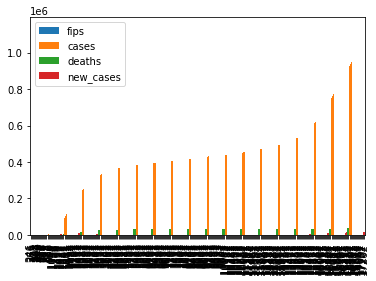

In [28]:
ny_df.plot(kind='bar')

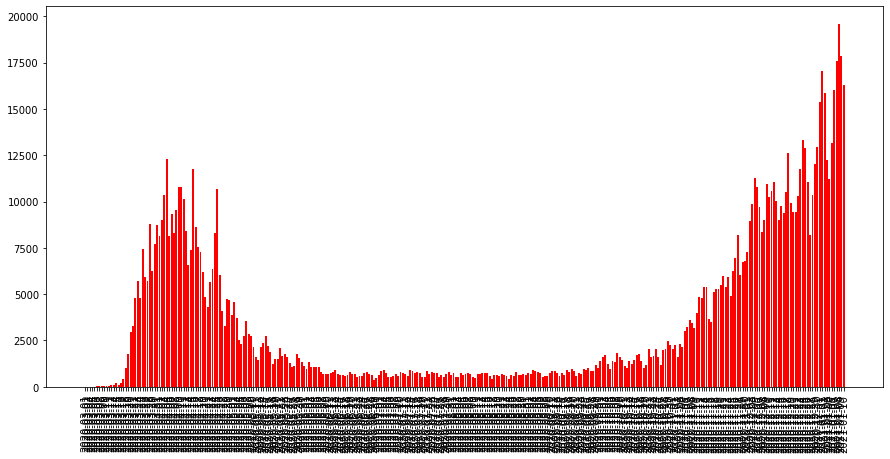

In [29]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

The graph above shows the number of new cases in NY since 2020-03-01. We can observed two big waves, and we are currently on the peak of the second wave. We nned to take more action to stop the spead. 

# Task4: Understand NY covid 19 data in last 30 days

In [68]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [69]:
ny_dates_30

15612    2020-12-11
15667    2020-12-12
15722    2020-12-13
15777    2020-12-14
15832    2020-12-15
15887    2020-12-16
15942    2020-12-17
15997    2020-12-18
16052    2020-12-19
16107    2020-12-20
16162    2020-12-21
16217    2020-12-22
16272    2020-12-23
16327    2020-12-24
16382    2020-12-25
16437    2020-12-26
16492    2020-12-27
16547    2020-12-28
16602    2020-12-29
16657    2020-12-30
16712    2020-12-31
16767    2021-01-01
16822    2021-01-02
16877    2021-01-03
16932    2021-01-04
16987    2021-01-05
17042    2021-01-06
17097    2021-01-07
17152    2021-01-08
17207    2021-01-09
Name: date, dtype: object

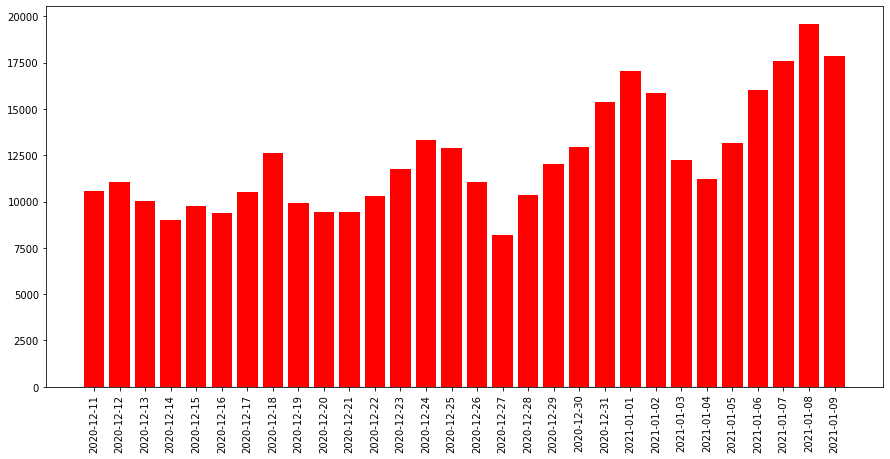

In [70]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

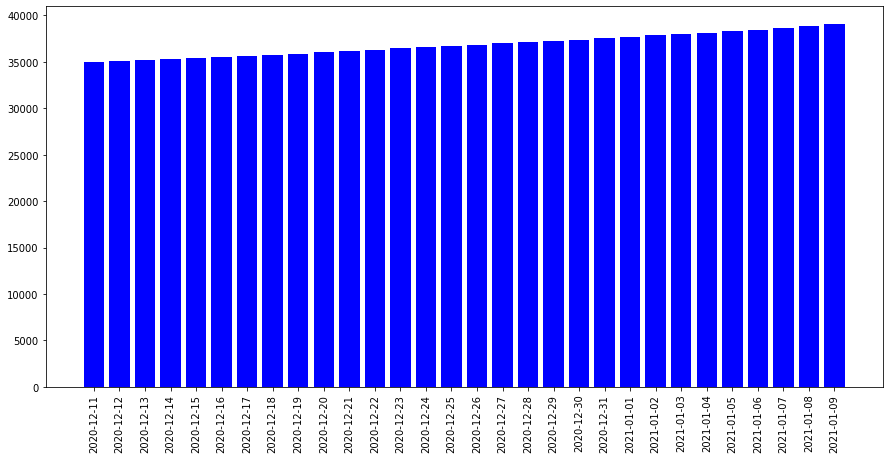

In [71]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [72]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

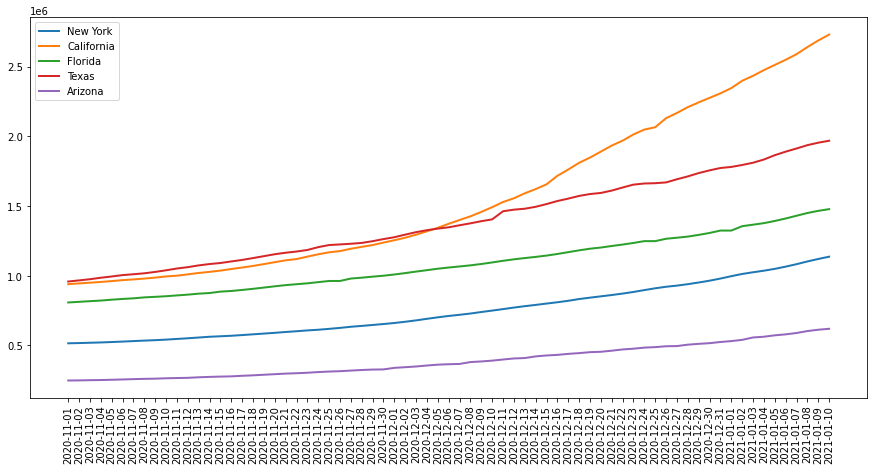

In [73]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1: The graph above in line 28 shows the number of new cases in NY since 2020-03-01. We can observed two big waves, and we are currently on the peak of the second wave. We need to take more action to stop the spead.
2.   Conclusion 2: The graph above in line 35 shows the number of total cases in 5 states in last 30 days. The cases in California has been increasing repidly since December. The governors should take more action to stop the spead. 


# Extra work 

I would like to take a closer look into the states that have most number of death. 

Which five states have most number of death?

In [74]:
# number of death in each state as of today
death =pd.DataFrame(df.groupby(['state'])['deaths'].max()) 

In [75]:
# top 5
death.nlargest(5, 'deaths')

,deaths
state,
New York,39208
Texas,30599
California,30000
Florida,22911
New Jersey,19886


In [76]:
# state name of the top 5
top_5 = death.nlargest(5, 'deaths')
names = list(top_5.index)
print(names)

['New York', 'Texas', 'California', 'Florida', 'New Jersey']


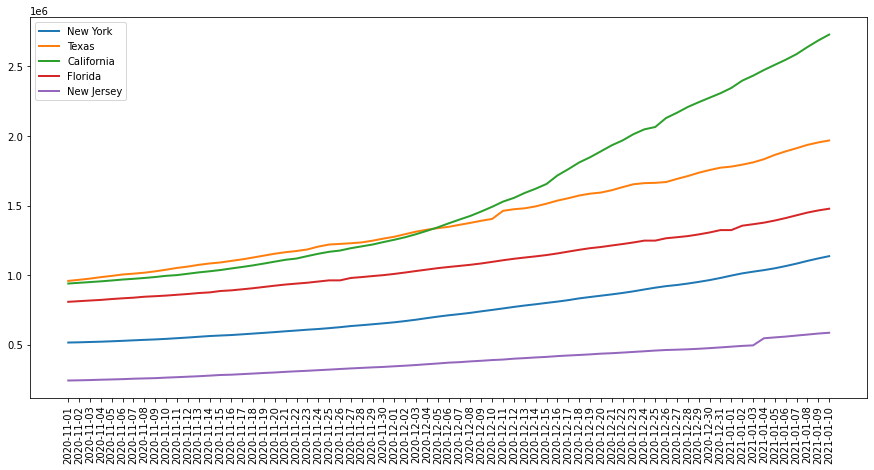

In [78]:
plt.figure(figsize=(15,7))
for state in names:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(names)
plt.show()

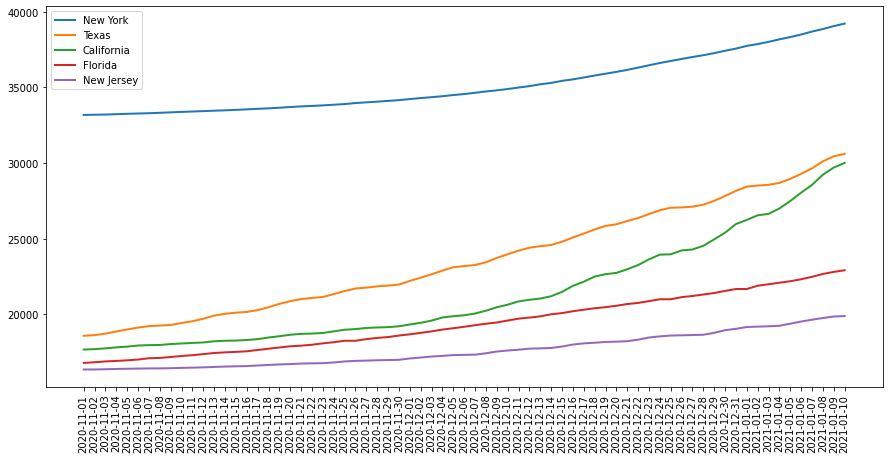

In [79]:
plt.figure(figsize=(15,7))
for state in names:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['deaths'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(names)
plt.show()